In [1]:
import sklearn as sks
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib as plt

In [ ]:
df = pd.read_csv("marketing_customer_analysis_clean.csv")

In [ ]:
df.describe

In [ ]:
df = df.dropna()

In [ ]:
scaler = StandardScaler()

In [ ]:
x = df[["customer_lifetime_value", "number_of_policies", "month"]]
y = df[["total_claim_amount"]]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [ ]:
x_train

In [ ]:
lm = LinearRegression()

In [ ]:
model = lm.fit(x_train, y_train)

In [ ]:
model.coef_

In [ ]:
model.intercept_

# Second Part

In [2]:
tips_df = sns.load_dataset("tips")

In [3]:
tips_df.shape

(244, 7)

In [4]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


## EDA

In [6]:
numericals = tips_df.select_dtypes(include=np.number)
categoricals = tips_df.select_dtypes(include= "category")



array([[<Axes: title={'center': 'total_bill'}>,
        <Axes: title={'center': 'tip'}>],
       [<Axes: title={'center': 'size'}>, <Axes: >]], dtype=object)

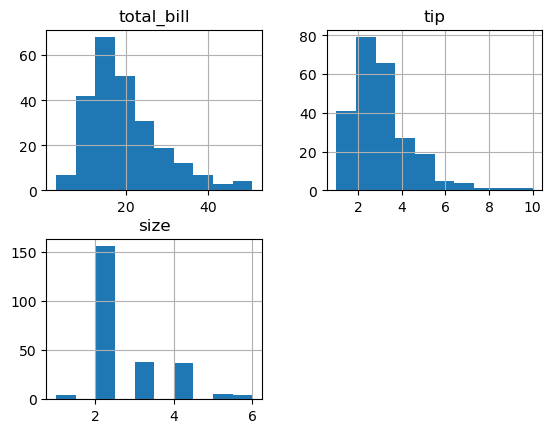

In [7]:
numericals.hist()

In [8]:
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt 

In [9]:
pt = PowerTransformer()

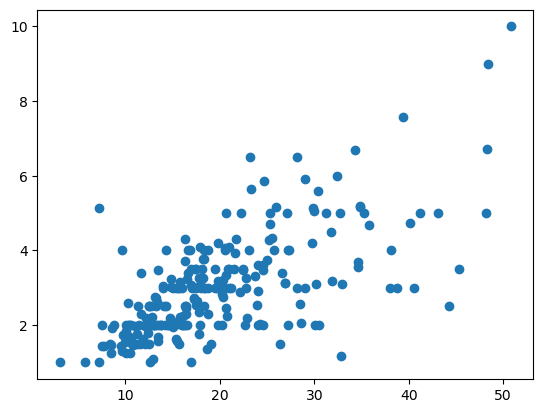

In [10]:
plt.scatter(x=numericals["total_bill"], y = numericals["tip"])

## Preprocessing

In [11]:
categoricals

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner
...,...,...,...,...
239,Male,No,Sat,Dinner
240,Female,Yes,Sat,Dinner
241,Male,Yes,Sat,Dinner
242,Male,No,Sat,Dinner


In [12]:
cat_encoded = pd.get_dummies(categoricals).astype(int)

In [13]:
cat_encoded

,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,0,1,0,1,0,0,0,1,0,1
1,1,0,0,1,0,0,0,1,0,1
2,1,0,0,1,0,0,0,1,0,1
3,1,0,0,1,0,0,0,1,0,1
4,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
239,1,0,0,1,0,0,1,0,0,1
240,0,1,1,0,0,0,1,0,0,1
241,1,0,1,0,0,0,1,0,0,1
242,1,0,0,1,0,0,1,0,0,1


In [14]:
final_df = pd.concat([numericals, cat_encoded], axis = 1)

# X Y SPLIT

In [15]:
X = final_df.drop(columns="tip")
y = final_df["tip"]

In [16]:
X.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,2,0,1,0,1,0,0,0,1,0,1
1,10.34,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3,1,0,0,1,0,0,0,1,0,1
3,23.68,2,1,0,0,1,0,0,0,1,0,1
4,24.59,4,0,1,0,1,0,0,0,1,0,1


# Train test split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Scaling / Standardizing / Power Transforming

In [18]:
scaler = StandardScaler()

In [37]:
np.array(y_train).reshape(-1, 1).shape

(183, 1)

In [40]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

##Power Transformer
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pt.fit(np.array(y_train).reshape(-1, 1))
y_train_t = pt.transform(np.array(y_train).reshape(-1, 1))
y_test_t = pt.transform(np.array(y_test).reshape(-1, 1))

## Modelling

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lm = LinearRegression()

In [53]:
model = lm.fit(X_train_scaled, y_train)

In [54]:
y_pred = model.predict(X_test_scaled)

In [55]:
y_test_t = y_test_t.reshape(61, 1)

In [56]:
y_pred = y_pred.reshape(61, 1)

In [61]:
residual_df = pd.DataFrame({"y_test": y_test_t, "y_pred": y_pred, "res": y_pred - y_test_t})

ValueError: Per-column arrays must each be 1-dimensional

In [ ]:
residual_df

In [26]:
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

In [58]:
model_mse = mse(y_test_t, y_pred)
model_r2 = r2(y_test_t, y_pred)
model_rmse = np.sqrt(model_mse)

In [59]:
model_r2, model_mse, model_rmse

(-10.535470402016557, 10.385246908161825, 3.2226149177588415)

# Feature importance

In [29]:
model.coef_

array([ 8.88548606e-01,  1.89554759e-01, -2.19663257e+13, -2.19663257e+13,
       -7.82005891e+12, -7.82005891e+12,  3.06551614e+12,  2.01083314e+12,
        3.41839863e+12,  3.28060303e+12,  6.33072283e+10,  6.33072283e+10])

In [30]:
model.intercept_

3.0770938661853067

In [31]:
fi_df = pd.DataFrame({"var": X_train.columns, "coef": model.coef_})
fi_df

,var,coef
0,total_bill,8.885486e-01
1,size,1.895548e-01
2,sex_Male,-2.196633e+13
3,sex_Female,-2.196633e+13
4,smoker_Yes,-7.820059e+12
5,smoker_No,-7.820059e+12
6,day_Thur,3.065516e+12
7,day_Fri,2.010833e+12
8,day_Sat,3.418399e+12
9,day_Sun,3.280603e+12


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'total_bill'),
  Text(1, 0, 'size'),
  Text(2, 0, 'sex_Male'),
  Text(3, 0, 'sex_Female'),
  Text(4, 0, 'smoker_Yes'),
  Text(5, 0, 'smoker_No'),
  Text(6, 0, 'day_Thur'),
  Text(7, 0, 'day_Fri'),
  Text(8, 0, 'day_Sat'),
  Text(9, 0, 'day_Sun'),
  Text(10, 0, 'time_Lunch'),
  Text(11, 0, 'time_Dinner')])

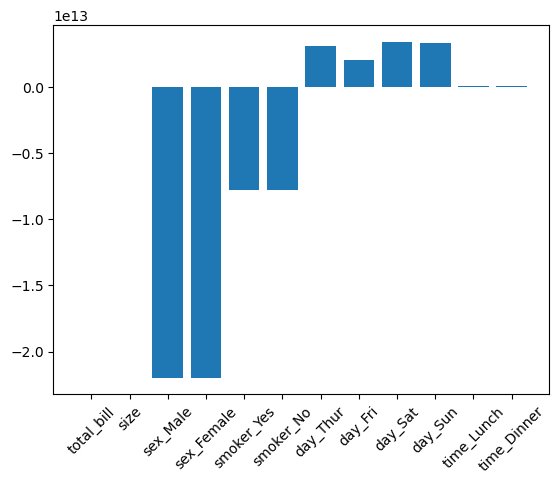

In [32]:
plt.bar(x=fi_df["var"], height=fi_df["coef"])
plt.xticks(rotation=45)

ValueError: x and y must be the same size

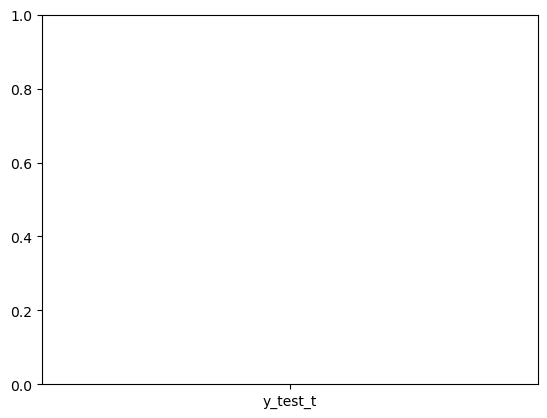

In [62]:
plt.scatter(x="y_test_t", y = y_pred)